In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# Observational data

In [ ]:
file = "trolleberg_20250612.csv"
df_raw = pd.read_csv(file, low_memory=False)

In [64]:
def applyfunc(m):
    """
    Columns to extract (values are always under 'v'):
    active_power
    available_active
    export_energy_kwh
    import_energy_kwh
    wind_speed_trolleberg-3
    wind_speed_trolleberg-2
    available_active_trolleberg-2
    available_active_trolleberg-3
    export_energy_kwh_trolleberg-3
    export_energy_kwh_trolleberg-2
    """
    
    d = json.loads(m)
    for k in d.keys():
        if isinstance(d[k], dict):
            d_sub = d[k]
            value = d_sub['v']
            
            #print(f"key: {k}, value: {value}")
            d[k] = value
    return d

In [ ]:
df_raw['m'] = df_raw['m'].apply(applyfunc)
df_raw.head()

In [67]:
json_expanded = pd.json_normalize(df_raw['m'])
json_expanded.head()

,export_energy_kwh,wind_speed_trolleberg-3,import_energy_kwh,wind_speed_trolleberg-2,export_energy_kwh_trolleberg-3,export_energy_kwh_trolleberg-2,active_power,avail_active_power,available_active_trolleberg-3,available_active_trolleberg-2,available_active
0,684101.0,5.1,18.5,5.6,350113.0,333988.0,387.42,430.0,NaN,NaN,NaN
1,684101.5,5.1,18.5,5.5,350113.3,333988.3,398.98,424.0,NaN,NaN,NaN
2,684102.0,5.1,18.5,5.5,350113.5,333988.6,412.83,410.0,NaN,NaN,NaN
3,684102.6,5.3,18.5,5.5,350113.8,333988.9,399.07,407.0,NaN,NaN,NaN
4,684103.2,5.3,18.5,5.5,350114.0,333989.3,374.56,421.0,NaN,NaN,NaN


In [68]:
df_obs = pd.concat([df_raw.drop(columns=['h','t','m','folder','dt']), json_expanded], axis=1)

In [69]:
df_obs['DateTime'] = pd.to_datetime(df_obs['loggertimestamp'], unit='s', utc=True)
df_obs = df_obs.drop(columns=['loggertimestamp'])
df_obs = df_obs.set_index('DateTime')

In [ ]:
df_obs = df_obs.resample('1s').first().ffill()
df_obs.head()

In [72]:
df_obs.tail()

,export_energy_kwh,wind_speed_trolleberg-3,import_energy_kwh,wind_speed_trolleberg-2,export_energy_kwh_trolleberg-3,export_energy_kwh_trolleberg-2,active_power,avail_active_power,available_active_trolleberg-3,available_active_trolleberg-2,available_active
DateTime,,,,,,,,,,,
2025-06-12 08:53:12+00:00,920454.7,0.4,20.4,0.1,468326.6,452128.1,-7.48,1043.0,0.0,0.0,0.0
2025-06-12 08:53:13+00:00,920454.7,0.4,20.4,0.1,468326.6,452128.1,-7.48,1043.0,0.0,0.0,0.0
2025-06-12 08:53:14+00:00,920454.7,0.4,20.4,0.1,468326.6,452128.1,-7.48,1043.0,0.0,0.0,0.0
2025-06-12 08:53:15+00:00,920454.7,0.4,20.4,0.1,468326.6,452128.1,-7.48,1043.0,0.0,0.0,0.0
2025-06-12 08:53:16+00:00,920454.7,0.3,20.4,0.1,468326.6,452128.1,-7.56,1043.0,0.0,0.0,0.0


<Axes: title={'center': 'Active Power over Time'}, xlabel='DateTime'>

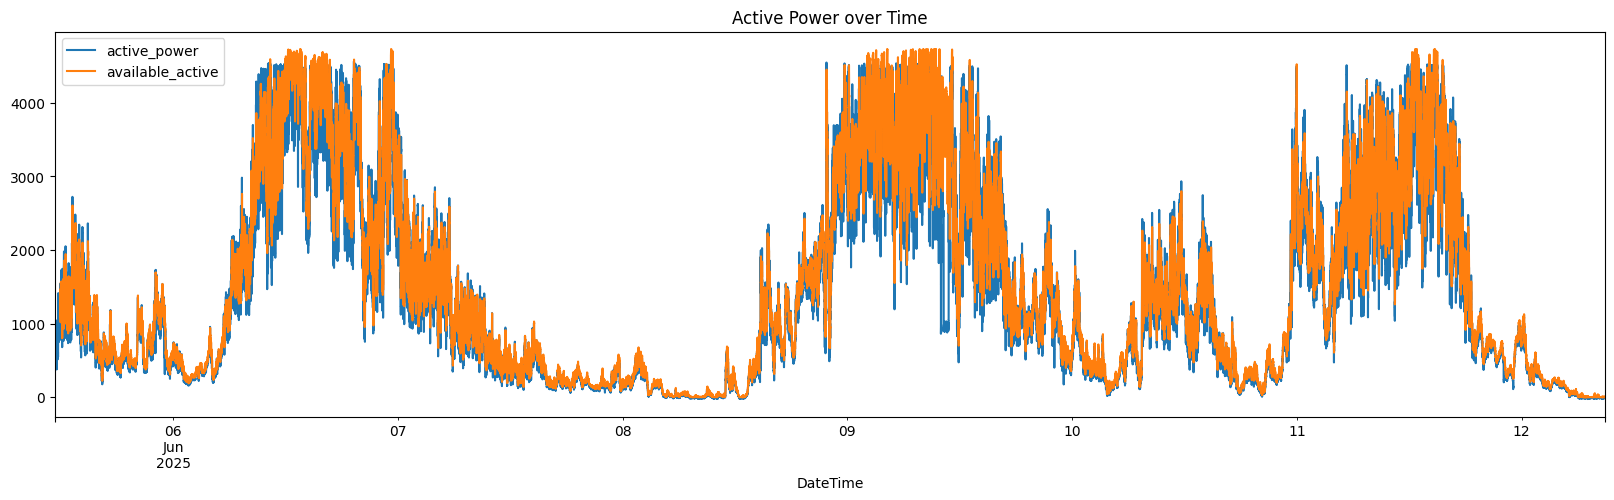

In [73]:
df_obs.plot(y=['active_power','available_active'], title='Active Power over Time', figsize=(20, 5))

<Axes: title={'center': 'Active Power over Time'}, xlabel='DateTime'>

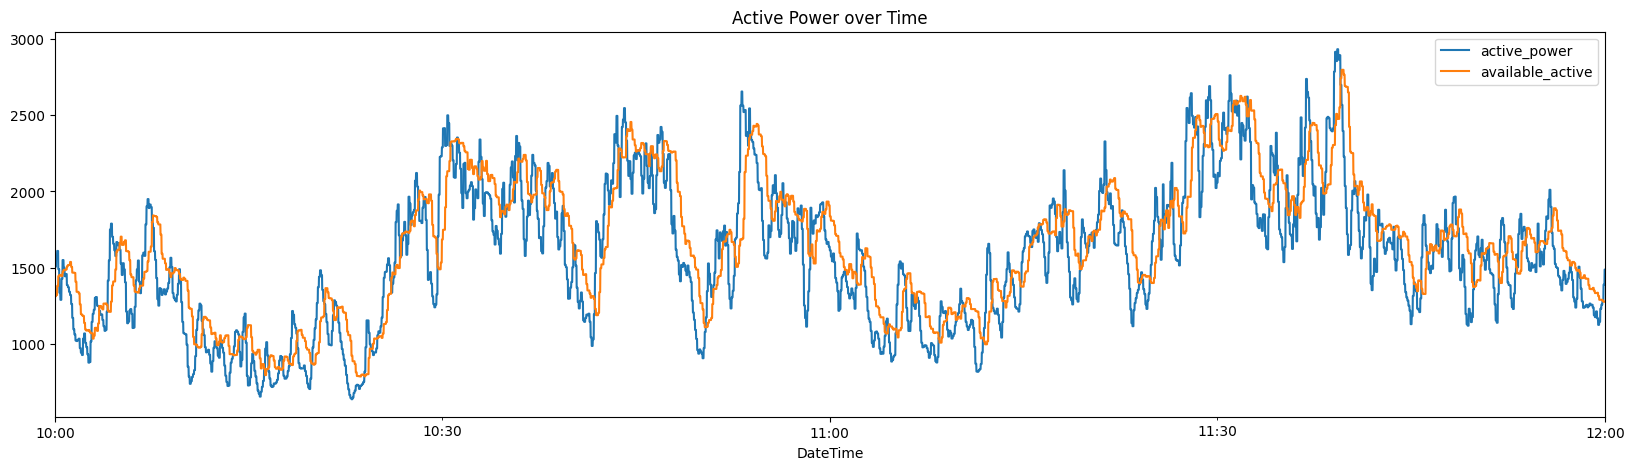

In [ ]:
start = '2025-06-10 10:00:00'
stop = '2025-06-10 12:00:00'
df_ = df_obs[start:stop]
df_.plot(y=['active_power','available_active'], title='Active Power over Time', figsize=(20, 5))

In [102]:
df_ = df_obs[df_obs['available_active'] > 1000]
mean_error = (df_['available_active']-df_['active_power']).mean()
print(f"Mean error between available active and active power: {mean_error:.2f} W")
mean_ratio = (df_['active_power']/df_['available_active']).mean()
print(f"Mean ratio of available active to active power: {mean_ratio:.4f}")

Mean error between available active and active power: 126.50 W
Mean ratio of available active to active power: 0.9528


In [256]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=15*60)  # 15 minutes in seconds
df_obs['15m_energy_measured'] = df_obs['active_power'].rolling(indexer).sum() / 3600
df_obs['15m_energy_available'] = df_obs['available_active'].rolling(indexer).sum() / 3600
df_obs_energy = df_obs[['15m_energy_measured', '15m_energy_available']].dropna()
df_obs_energy = df_obs_energy.resample('15min').first()

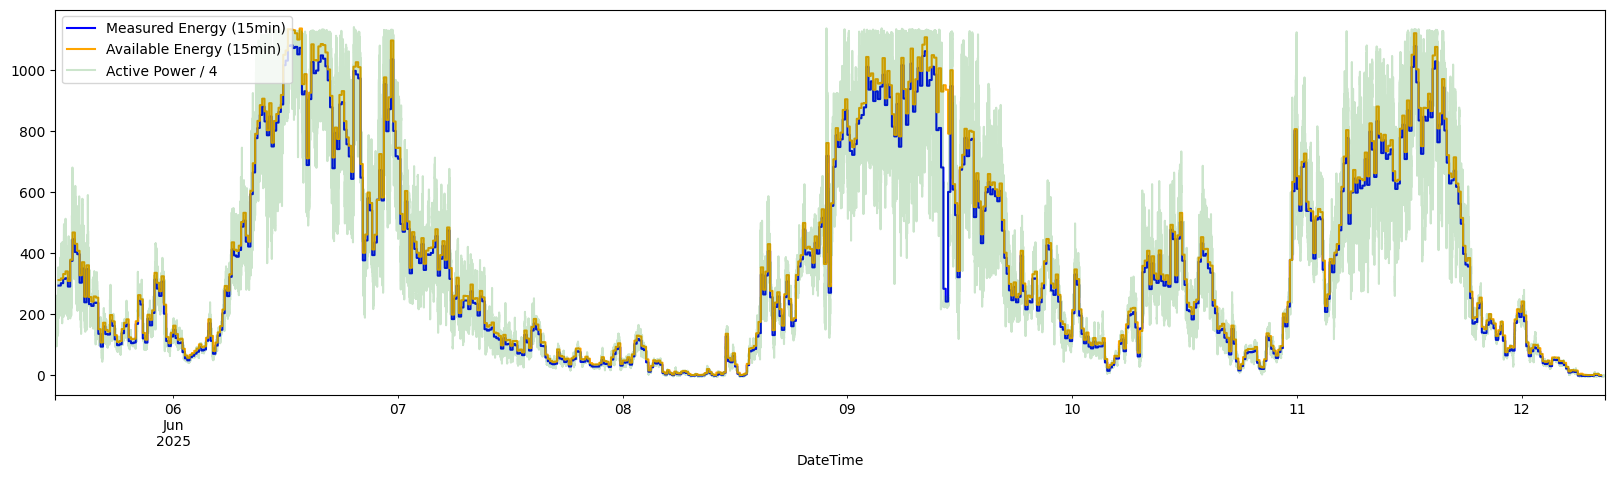

In [257]:
fig, ax = plt.subplots(figsize=(20, 5))
df_obs_energy['15m_energy_measured'].plot(ax=ax, label='Measured Energy (15min)', drawstyle='steps-post', color='blue')
df_obs_energy['15m_energy_available'].plot(ax=ax, label='Available Energy (15min)', drawstyle='steps-post', color='orange')
(df_obs['active_power']/4).plot(ax=ax, label='Active Power / 4', color='green', alpha=0.2)
ax.legend()
#start = '2025-06-09 08:00:00'
#end = '2025-06-09 15:00:00'
#ax.set_xlim(start, end)

(1749456000.0, 1749481200.0)

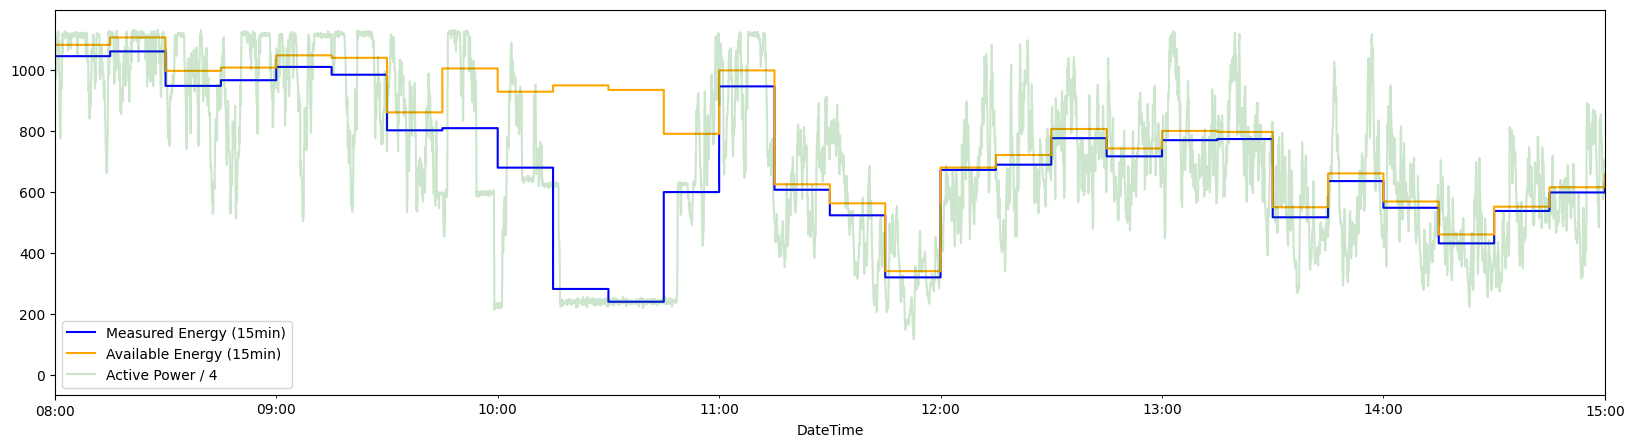

In [258]:
fig, ax = plt.subplots(figsize=(20, 5))
df_obs_energy['15m_energy_measured'].plot(ax=ax, label='Measured Energy (15min)', drawstyle='steps-post', color='blue')
df_obs_energy['15m_energy_available'].plot(ax=ax, label='Available Energy (15min)', drawstyle='steps-post', color='orange')
(df_obs['active_power']/4).plot(ax=ax, label='Active Power / 4', color='green', alpha=0.2)
ax.legend()
start = '2025-06-09 08:00:00'
end = '2025-06-09 15:00:00'
ax.set_xlim(start, end)

# During june6th 10h-11h, we curtailed for mfrr tests

In [259]:
# Drop the period where we curtailed for MFRR testing
mask = (df_obs_energy.index < '2025-06-09 10:00:00') | (df_obs_energy.index > '2025-06-09 11:00:00')
df_obs_energy = df_obs_energy[mask]

# Remove periods when available energy is below a threshold
df_obs_energy = df_obs_energy[df_obs_energy['15m_energy_available'] > 400]

mean_energy_error = (df_obs_energy['15m_energy_available'] - df_obs_energy['15m_energy_measured']).mean()
print(f"Mean energy error (15min) between available and measured: {mean_energy_error:.4f} kWh")
mean_energy_ratio = (df_obs_energy['15m_energy_measured']/df_obs_energy['15m_energy_available']).mean()
print(f"Mean energy ratio (15min) of available to measured: {mean_energy_ratio:.4f}")

Mean energy error (15min) between available and measured: 28.6194 kWh
Mean energy ratio (15min) of available to measured: 0.9608


# Predictions

In [80]:
file_forecasts = "Trolleberg_latest_wind_forecasts_2025_06_12.csv"
df_forec = pd.read_csv(file_forecasts)
df_forec['valid_time_cet'] = pd.to_datetime(df_forec['valid_time_cet'])

df_forec['valid_time_cet'] = df_forec['valid_time_cet'].dt.tz_localize('Europe/Stockholm').dt.tz_convert('UTC')
df_forec = df_forec.rename(columns={"valid_time_cet": "valid_time_utc"})
df_forec = df_forec.set_index('valid_time_utc', drop=False)
df_forec['total_predicted_power_kw'] = 1000* df_forec['total_predicted_power_mw']
df_forec = df_forec.drop(columns=['fetch_time_cet', 'valid_time_utc', 'predict_horizon_days_cet'])

start = '2025-06-05 11:30:00'
df_forec = df_forec[start:]

df_forec.columns

Index(['total_predicted_power_mw', 'total_predicted_power_kw'], dtype='object')

In [81]:
df_forec.head()

,total_predicted_power_mw,total_predicted_power_kw
valid_time_utc,,
2025-06-05 11:30:00+00:00,0.722,722.0
2025-06-05 11:45:00+00:00,0.648,648.0
2025-06-05 12:00:00+00:00,0.592,592.0
2025-06-05 12:15:00+00:00,0.598,598.0
2025-06-05 12:30:00+00:00,0.606,606.0


In [82]:
df = df_obs.merge(df_forec, left_index=True, right_index=True, how='outer').ffill()

<Axes: title={'center': 'Active Power vs Predicted Power'}>

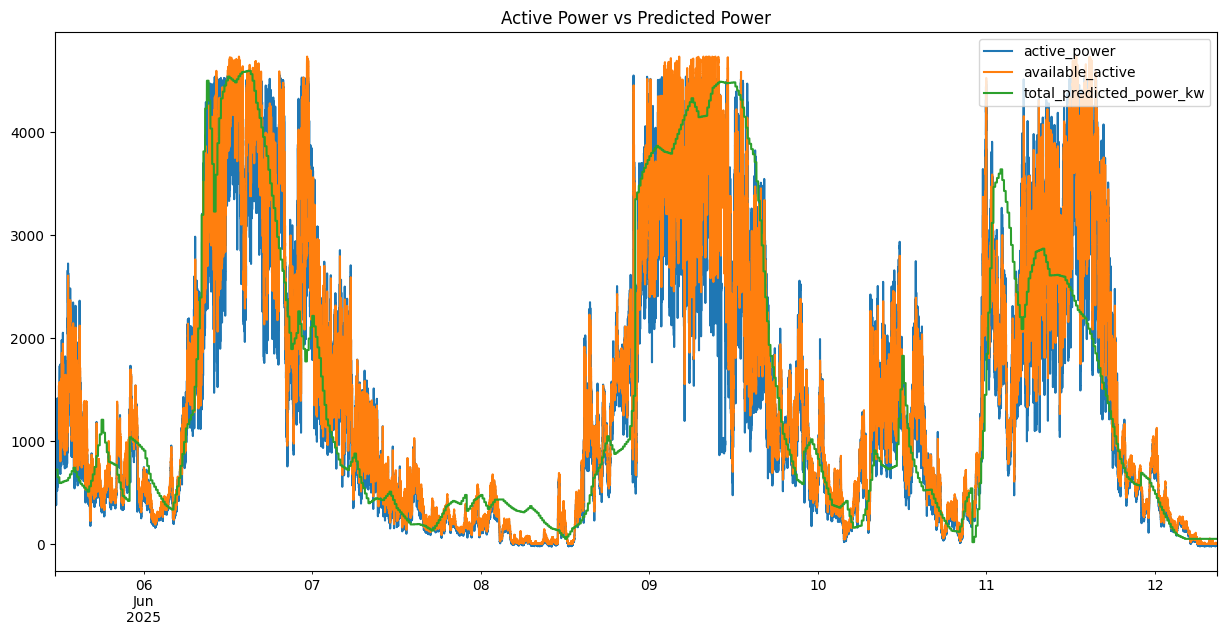

In [83]:
df.plot(y=['active_power', 'available_active', 'total_predicted_power_kw'], title='Active Power vs Predicted Power', figsize=(15, 7))

Text(0, 0.5, 'Wind Speed (m/s)')

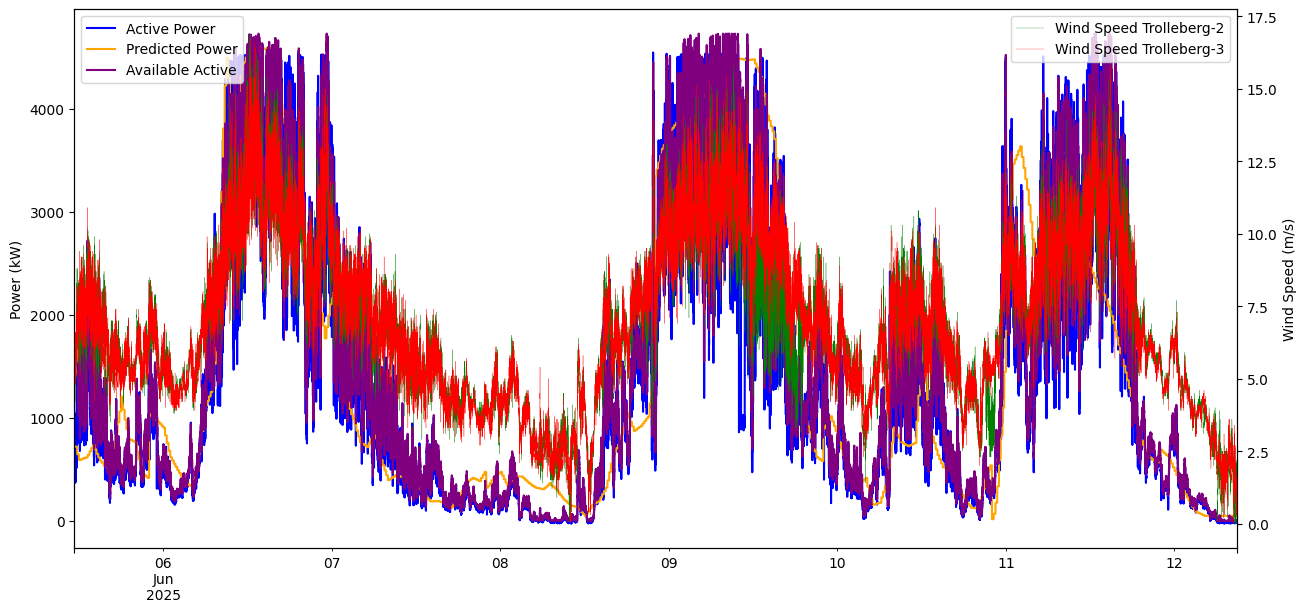

In [84]:
fig, ax = plt.subplots(figsize=(15, 7))
df.plot(y='active_power', ax=ax, label='Active Power', color='blue')
df.plot(y='total_predicted_power_kw', ax=ax, label='Predicted Power', color='orange')
df.plot(y='available_active', ax=ax, label='Available Active', color='purple')
ax.set_ylabel('Power (kW)')
axr = ax.twinx()
df.plot(y='wind_speed_trolleberg-2', ax=axr, label='Wind Speed Trolleberg-2', lw=0.2, color='green')
df.plot(y='wind_speed_trolleberg-3', ax=axr, label='Wind Speed Trolleberg-3', lw=0.2, color='red')
axr.set_ylabel('Wind Speed (m/s)')

# Compare against DSO data

In [261]:
file_dso = 'trolleberg_sold_vs_produced_20250612.csv'
df_dso = pd.read_csv(file_dso)
df_dso = df_dso.set_index(pd.to_datetime(df_dso['ts']))
df_dso = df_dso.tz_localize('Europe/Stockholm').tz_convert('UTC')
df_dso = df_dso.drop(columns=['ts'])
df_dso = df_dso.rename(columns={'sum(sell_vol_kwh)': 'sold_energy_kwh', 'sum(production_kwh)': 'produced_energy_kwh'})
#df_dso = df_dso.resample('1s').first().ffill()

df_dso.head()

,sold_energy_kwh,produced_energy_kwh
ts,,
2025-06-03 22:00:00+00:00,602.80,606.0
2025-06-03 22:15:00+00:00,602.80,650.0
2025-06-03 22:30:00+00:00,602.80,681.0
2025-06-03 22:45:00+00:00,602.80,663.0
2025-06-03 23:00:00+00:00,700.15,597.0


<Axes: title={'center': 'Sold vs Produced Energy'}, xlabel='ts'>

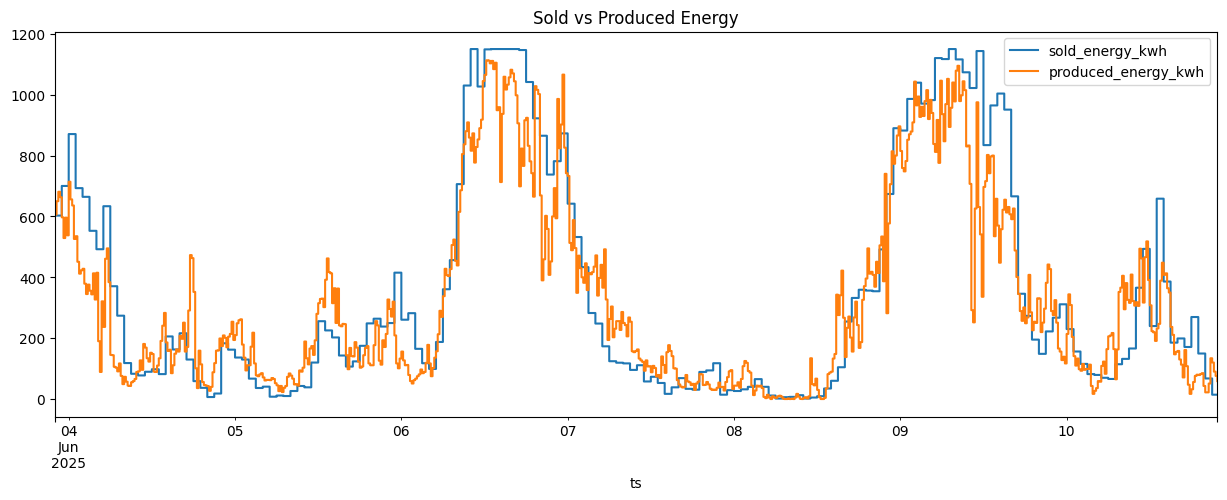

In [262]:
df_dso.plot(figsize=(15, 5), title='Sold vs Produced Energy', drawstyle='steps-post')

<Axes: title={'center': 'Sold vs Produced Energy (Zoomed)'}, xlabel='ts'>

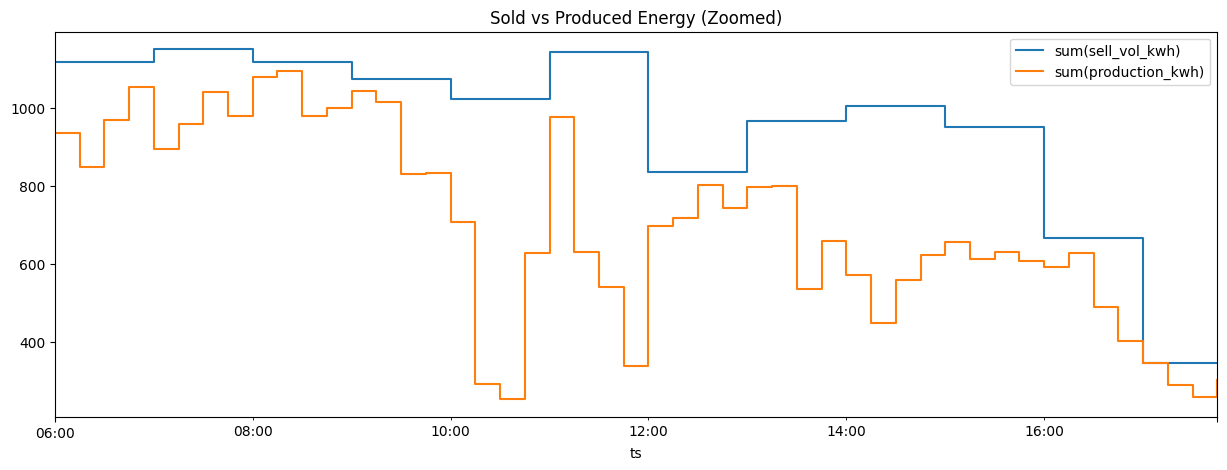

In [87]:
# Take a look at when we curtailed for mfrr testing
mask = (df_dso.index >= '2025-06-09 06:00:00') & (df_dso.index <= '2025-06-09 17:59:59')
df_dso.loc[mask].plot(figsize=(15, 5), title='Sold vs Produced Energy (Zoomed)', drawstyle='steps-post')

In [88]:

df_obs

,export_energy_kwh,wind_speed_trolleberg-3,import_energy_kwh,wind_speed_trolleberg-2,export_energy_kwh_trolleberg-3,export_energy_kwh_trolleberg-2,active_power,avail_active_power,available_active_trolleberg-3,available_active_trolleberg-2,available_active,15m_energy_measured,15m_energy_available
DateTime,,,,,,,,,,,,,
2025-06-05 11:21:36+00:00,684101.0,5.1,18.5,5.6,350113.0,333988.0,387.42,430.0,NaN,NaN,NaN,138.395711,NaN
2025-06-05 11:21:37+00:00,684101.0,5.1,18.5,5.6,350113.0,333988.0,387.42,430.0,NaN,NaN,NaN,138.570322,NaN
2025-06-05 11:21:38+00:00,684101.0,5.1,18.5,5.6,350113.0,333988.0,387.42,430.0,NaN,NaN,NaN,138.739353,NaN
2025-06-05 11:21:39+00:00,684101.0,5.1,18.5,5.6,350113.0,333988.0,387.42,430.0,NaN,NaN,NaN,138.908383,NaN
2025-06-05 11:21:40+00:00,684101.0,5.1,18.5,5.6,350113.0,333988.0,387.42,430.0,NaN,NaN,NaN,139.077414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-12 08:53:12+00:00,920454.7,0.4,20.4,0.1,468326.6,452128.1,-7.48,1043.0,0.0,0.0,0.0,NaN,NaN
2025-06-12 08:53:13+00:00,920454.7,0.4,20.4,0.1,468326.6,452128.1,-7.48,1043.0,0.0,0.0,0.0,NaN,NaN
2025-06-12 08:53:14+00:00,920454.7,0.4,20.4,0.1,468326.6,452128.1,-7.48,1043.0,0.0,0.0,0.0,NaN,NaN


In [241]:
# create new dataframe with only the available power
df_obs_agg = df_obs[['available_active']].rename(columns={'available_active':'available_active_kwh'}).copy()
# resample to 15 minutes and sum the available power. Each sample is x/3600 kWh.
df_obs_agg = df_obs_agg.resample('15min').sum() 
# divide the sum by 3600 to get the correct kWh value
df_obs_agg['available_active_kwh'] = df_obs_agg['available_active_kwh'] / 60 / 60


In [242]:
df_dso_merged = df_dso.merge(df_obs_agg, left_index=True, right_index=True, how='outer')
df_dso_merged = df_dso_merged['2025-06-05 12:00:00':]
df_dso_merged['produced_available_ratio'] = df_dso_merged['sum(production_kwh)']/ df_dso_merged['available_active_kwh']
#df_dso_merged['active_power'] = df_obs['active_power']
df_dso_merged.head()

,sum(sell_vol_kwh),sum(production_kwh),available_active_kwh,produced_available_ratio
2025-06-05 12:00:00+00:00,255.75,315.0,316.914444,0.993959
2025-06-05 12:15:00+00:00,255.75,329.0,331.346111,0.992919
2025-06-05 12:30:00+00:00,255.75,330.0,340.105556,0.970287
2025-06-05 12:45:00+00:00,255.75,302.0,308.735556,0.978183
2025-06-05 13:00:00+00:00,225.50,392.0,378.378056,1.036001


<Axes: >

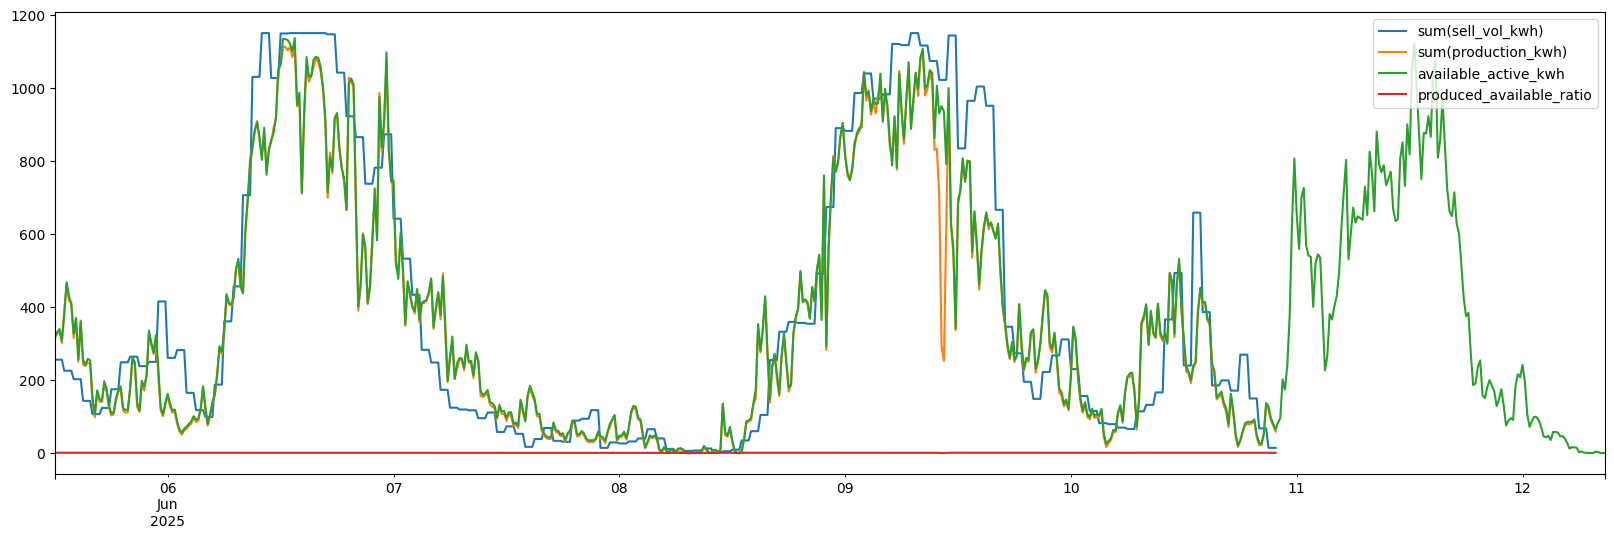

In [243]:
df_dso_merged.plot(figsize=(20,6))

KeyError: 'available_active'

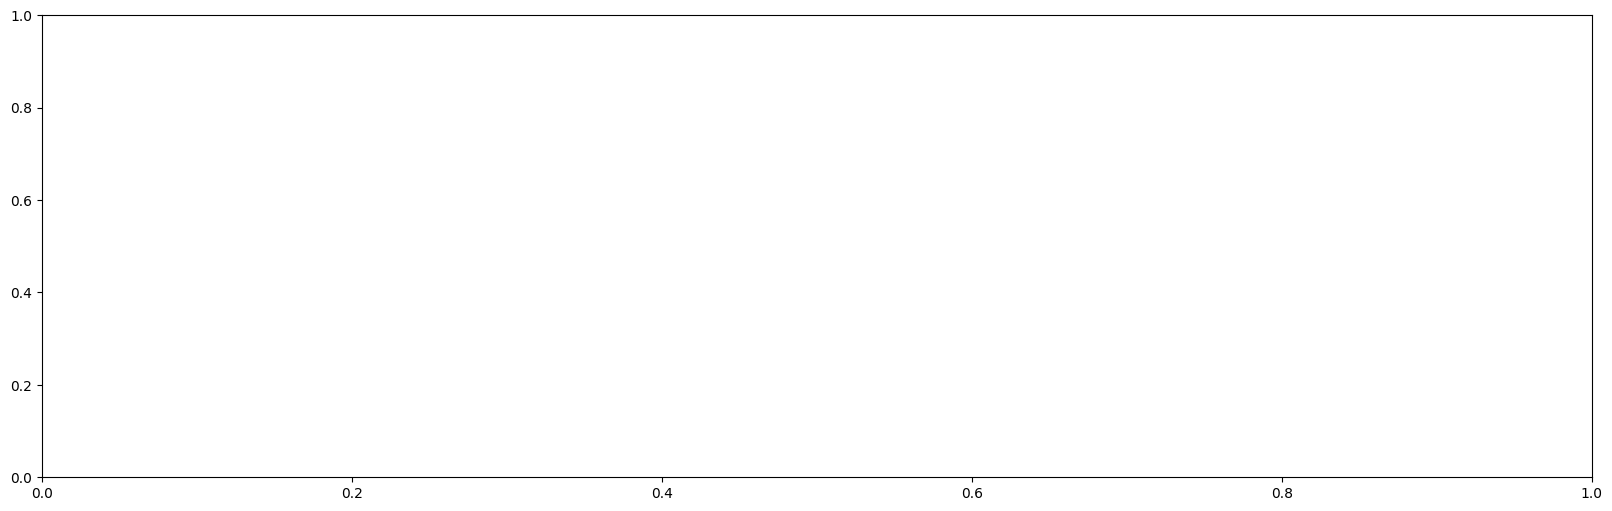

In [260]:
fig, ax = plt.subplots(figsize=(20, 6))
df_dso_merged.plot(y='available_active', ax=ax, label='Available Active Power', color='blue', drawstyle='steps-post')
df_dso_merged.plot(y='sum(sell_vol_kwh)', ax=ax, label='Sold Energy (kWh)', color='orange', drawstyle='steps-post')
df_dso_merged.plot(y='sum(production_kwh)', ax=ax, label='Produced Energy (kWh)', color='green', drawstyle='steps-post')
#axr = ax.twinx()
#df_dso_merged.plot(y='produced_available_ratio', ax=axr, label='Available Active / Produced Energy', color='purple')
#ax.plot(df_dso_merged.index, df_dso_merged['available_active']/df_dso_merged['sum(production_kwh)'], label='Available Active / Produced Energy', color='purple')

In [199]:
def print_baseline_stats(df, baseline_error_col):
    filtered_availablep_baseline_mean_error = df[baseline_error_col].mean()
    print(f"|Mean error| = {filtered_availablep_baseline_mean_error:.2f} kW")

    filtered_availablep_baseline_percentile_95 = df[baseline_error_col].quantile(0.95)
    filtered_availablep_baseline_percentile_5 = df[baseline_error_col].quantile(0.05)
    print(f"|95th - 5th percentile error| / 2 = {np.abs(filtered_availablep_baseline_percentile_95 - filtered_availablep_baseline_percentile_5)/2:.2f} kW")


# Evaluate baseline methods
---

# Case 0: We use the available p as baseline

In [246]:
df_c0 = df_obs[['active_power','available_active']].resample('1s').first().ffill()
df_c0.head()
df_c0 = df_c0.dropna()
df_c0['baseline_error'] = df_c0['available_active'] - df_c0['active_power']
df_c0['baseline_error_filtered'] = df_c0['baseline_error'].rolling(window=5*60).mean()
df_c0 = df_c0.dropna()

In [247]:
df_c0.head()

,active_power,available_active,baseline_error,baseline_error_filtered
DateTime,,,,
2025-06-05 12:01:23+00:00,1407.13,1321.0,-86.13,53.091667
2025-06-05 12:01:24+00:00,1462.84,1321.0,-141.84,53.381433
2025-06-05 12:01:25+00:00,1462.84,1321.0,-141.84,53.671200
2025-06-05 12:01:26+00:00,1462.84,1321.0,-141.84,53.960967
2025-06-05 12:01:27+00:00,1462.84,1321.0,-141.84,54.250733


<Axes: xlabel='DateTime'>

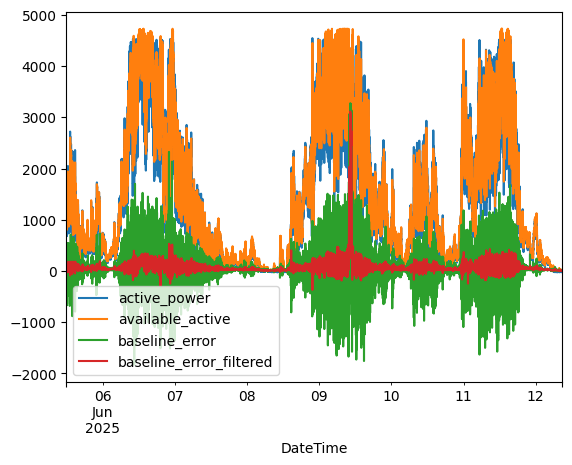

In [248]:
df_c0.plot()

In [249]:
print_baseline_stats(df_c0, 'baseline_error')

|Mean error| = 84.29 kW
|95th - 5th percentile error| / 2 = 428.72 kW


In [250]:
print_baseline_stats(df_c0, 'baseline_error_filtered')

|Mean error| = 84.31 kW
|95th - 5th percentile error| / 2 = 112.71 kW


In [251]:
# Select only periods where we have sold energy above a certain threshold
threshold = 1500 # 1.5 MW for 15 minutes
df_ = df_c0[df_c0['active_power'] > threshold]

In [252]:
print_baseline_stats(df_, 'baseline_error')

|Mean error| = 94.65 kW
|95th - 5th percentile error| / 2 = 633.36 kW


In [253]:
print_baseline_stats(df_, 'baseline_error_filtered')

|Mean error| = 112.44 kW
|95th - 5th percentile error| / 2 = 163.99 kW


# Case 1: We can use the production plan as our baseline

In [94]:
df_c1 = df_dso.resample('1s').first().ffill()
df_c1.head()

,sum(sell_vol_kwh),sum(production_kwh)
ts,,
2025-06-03 22:00:00+00:00,602.8,606.0
2025-06-03 22:00:01+00:00,602.8,606.0
2025-06-03 22:00:02+00:00,602.8,606.0
2025-06-03 22:00:03+00:00,602.8,606.0
2025-06-03 22:00:04+00:00,602.8,606.0


In [95]:
df_obs.head()

,export_energy_kwh,wind_speed_trolleberg-3,import_energy_kwh,wind_speed_trolleberg-2,export_energy_kwh_trolleberg-3,export_energy_kwh_trolleberg-2,active_power,avail_active_power,available_active_trolleberg-3,available_active_trolleberg-2,available_active,15m_energy_measured,15m_energy_available
DateTime,,,,,,,,,,,,,
2025-06-05 11:21:36+00:00,684101.0,5.1,18.5,5.6,350113.0,333988.0,387.42,430.0,NaN,NaN,NaN,138.395711,NaN
2025-06-05 11:21:37+00:00,684101.0,5.1,18.5,5.6,350113.0,333988.0,387.42,430.0,NaN,NaN,NaN,138.570322,NaN
2025-06-05 11:21:38+00:00,684101.0,5.1,18.5,5.6,350113.0,333988.0,387.42,430.0,NaN,NaN,NaN,138.739353,NaN
2025-06-05 11:21:39+00:00,684101.0,5.1,18.5,5.6,350113.0,333988.0,387.42,430.0,NaN,NaN,NaN,138.908383,NaN
2025-06-05 11:21:40+00:00,684101.0,5.1,18.5,5.6,350113.0,333988.0,387.42,430.0,NaN,NaN,NaN,139.077414,NaN


In [96]:
# Make series start when there is observation data
df_c1 = df_c1[df_c1.index >= '2025-06-05 11:30:00']

# Drop the period where we curtailed for MFRR testing
mask = (df_c1.index < '2025-06-09 10:00:00') | (df_c1.index > '2025-06-09 12:00:00')
df_c1 = df_c1[mask]

df_c1 = df_c1.merge(df_obs, left_index=True, right_index=True, how='left').ffill()
df_c1.head()

,sum(sell_vol_kwh),sum(production_kwh),export_energy_kwh,wind_speed_trolleberg-3,import_energy_kwh,wind_speed_trolleberg-2,export_energy_kwh_trolleberg-3,export_energy_kwh_trolleberg-2,active_power,avail_active_power,available_active_trolleberg-3,available_active_trolleberg-2,available_active,15m_energy_measured,15m_energy_available
ts,,,,,,,,,,,,,,,
2025-06-05 11:30:00+00:00,119.9,193.0,684170.5,6.2,18.5,6.0,350150.3,334020.2,573.09,580.0,NaN,NaN,NaN,183.165467,NaN
2025-06-05 11:30:01+00:00,119.9,193.0,684170.5,6.2,18.5,6.0,350150.3,334020.2,573.09,580.0,NaN,NaN,NaN,183.324889,NaN
2025-06-05 11:30:02+00:00,119.9,193.0,684171.4,6.2,18.5,6.3,350150.9,334020.5,582.87,580.0,NaN,NaN,NaN,183.484311,NaN
2025-06-05 11:30:03+00:00,119.9,193.0,684171.4,6.2,18.5,6.3,350150.9,334020.5,582.87,580.0,NaN,NaN,NaN,183.641017,NaN
2025-06-05 11:30:04+00:00,119.9,193.0,684171.4,6.2,18.5,6.3,350150.9,334020.5,582.87,580.0,NaN,NaN,NaN,183.815147,NaN


In [97]:
df_c1 = df_c1[['sum(sell_vol_kwh)', 'active_power']]
df_c1['pp_baseline'] = df_c1['sum(sell_vol_kwh)'] * 4
df_c1 = df_c1.drop(columns=['sum(sell_vol_kwh)'])
df_c1['pp_baseline_error'] = df_c1['pp_baseline'] - df_c1['active_power']
df_c1['pp_baseline_error_filtered'] = df_c1['pp_baseline_error'].rolling(window=5*60, min_periods=1).mean()

<Axes: xlabel='ts'>

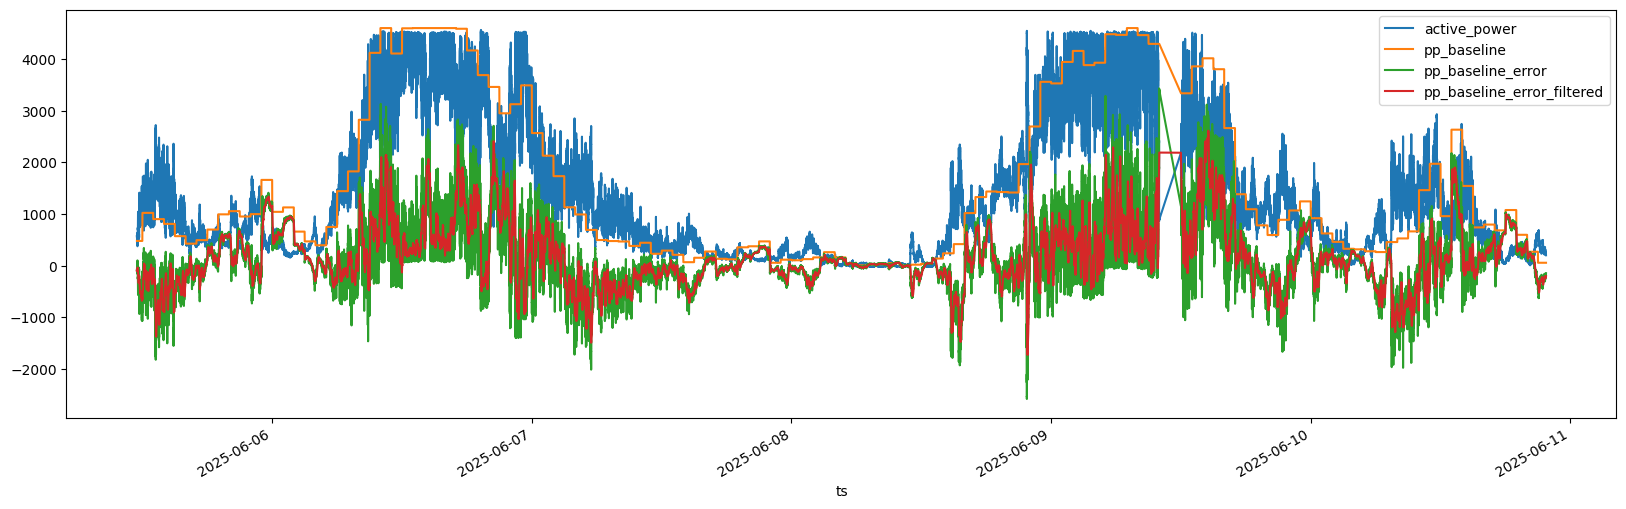

In [98]:
df_c1.plot(figsize=(20,6))

In [254]:
print("Using all time series data, no threshold")
print("--- Unfiltered ---")
print_baseline_stats(df_c1, 'pp_baseline_error')
print("\n--- Filtered ---")
print_baseline_stats(df_c1, 'pp_baseline_error_filtered')

Using all time series data, no threshold
--- Unfiltered ---
|Mean error| = 169.40 kW
|95th - 5th percentile error| / 2 = 1077.90 kW

--- Filtered ---
|Mean error| = 169.43 kW
|95th - 5th percentile error| / 2 = 989.28 kW


In [255]:
# Assume we will not bid mfrr when below a threshold
min_mfrr_threshold = 1500  # kW
df_ = df_c1[df_c1['pp_baseline'] > min_mfrr_threshold]

print(f"Assumed power threshold for MFRR bidding: {min_mfrr_threshold} kW")

print("--- Unfiltered ---")
print_baseline_stats(df_, 'pp_baseline_error')
print("\n--- Filtered ---")
print_baseline_stats(df_, 'pp_baseline_error_filtered')

Assumed power threshold for MFRR bidding: 1500 kW
--- Unfiltered ---
|Mean error| = 645.15 kW
|95th - 5th percentile error| / 2 = 1225.19 kW

--- Filtered ---
|Mean error| = 640.99 kW
|95th - 5th percentile error| / 2 = 1052.06 kW


# Case 2: We do a dynamic baseline with 5 minute resolution, using a 5 minute rolling average of available power as the value

In [177]:
df_c2 = df_obs[['available_active','active_power']].copy()
df_c2['available_active_filtered'] = df_c2['available_active'].rolling(window=5*60, min_periods=1).mean()
df_c2 = df_c2.dropna()
df_c2_tmp = df_c2[['available_active','available_active_filtered']].resample('5min').first()
df_c2_tmp = df_c2_tmp.resample('1s').ffill()
df_c2_tmp = df_c2_tmp.dropna()
# rename columns
df_c2_tmp = df_c2_tmp.rename(columns={'available_active': 'baseline_0', 'available_active_filtered': 'baseline_1'})


In [178]:
df_c2.head()

,available_active,active_power,available_active_filtered
DateTime,,,
2025-06-05 11:56:24+00:00,1095.0,1323.77,1095.0
2025-06-05 11:56:25+00:00,1095.0,1323.77,1095.0
2025-06-05 11:56:26+00:00,1095.0,1323.77,1095.0
2025-06-05 11:56:27+00:00,1095.0,1323.77,1095.0
2025-06-05 11:56:28+00:00,1095.0,1323.77,1095.0


In [179]:
df_c2_tmp.head()

,baseline_0,baseline_1
DateTime,,
2025-06-05 11:55:00+00:00,1095.0,1095.0
2025-06-05 11:55:01+00:00,1095.0,1095.0
2025-06-05 11:55:02+00:00,1095.0,1095.0
2025-06-05 11:55:03+00:00,1095.0,1095.0
2025-06-05 11:55:04+00:00,1095.0,1095.0


In [180]:
df_c2 = df_c2.merge(df_c2_tmp, left_index=True, right_index=True, how='right')

<Axes: xlabel='DateTime'>

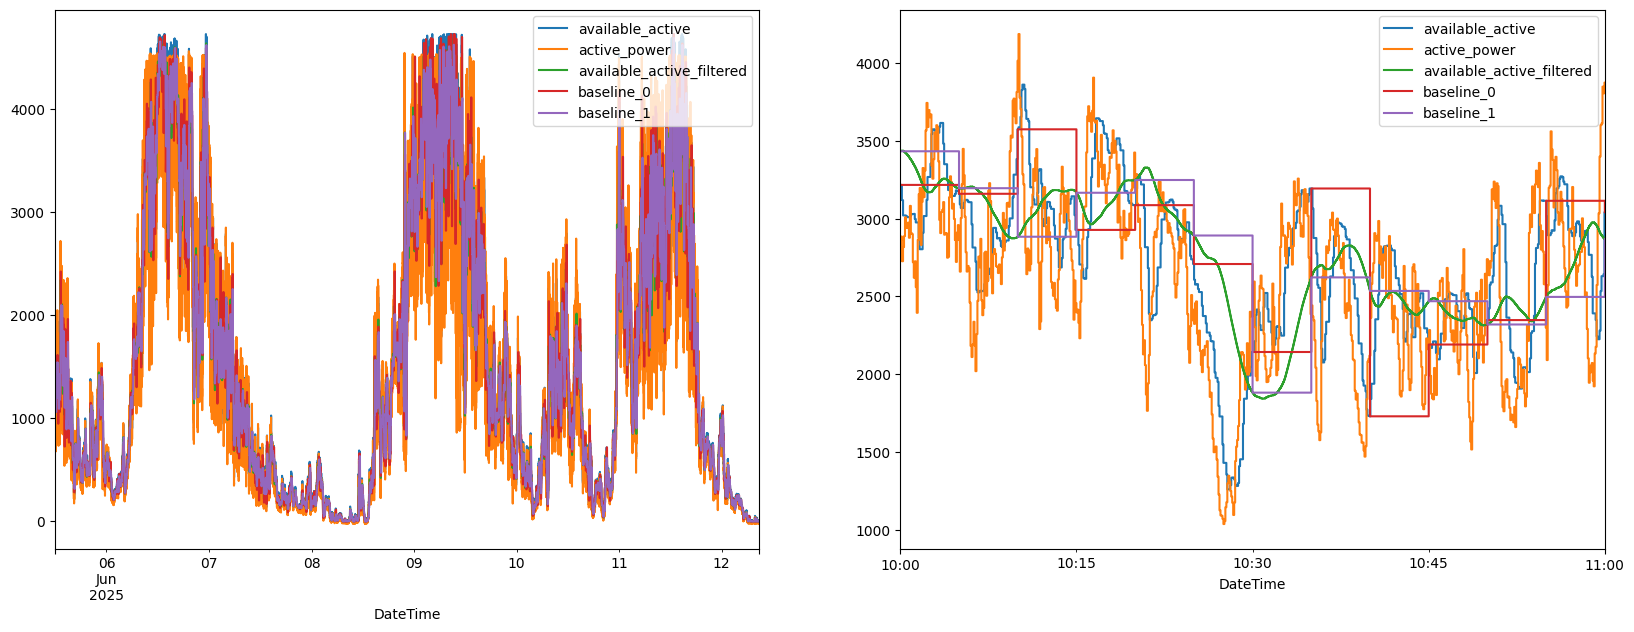

In [181]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 7))
df_c2.plot(ax=ax1)
start = '2025-06-11 10:00:00'
end = '2025-06-11 11:00:00'
df_ = df_c2[start:end]
df_.plot(ax=ax2, drawstyle='steps-post')

<Axes: xlabel='DateTime'>

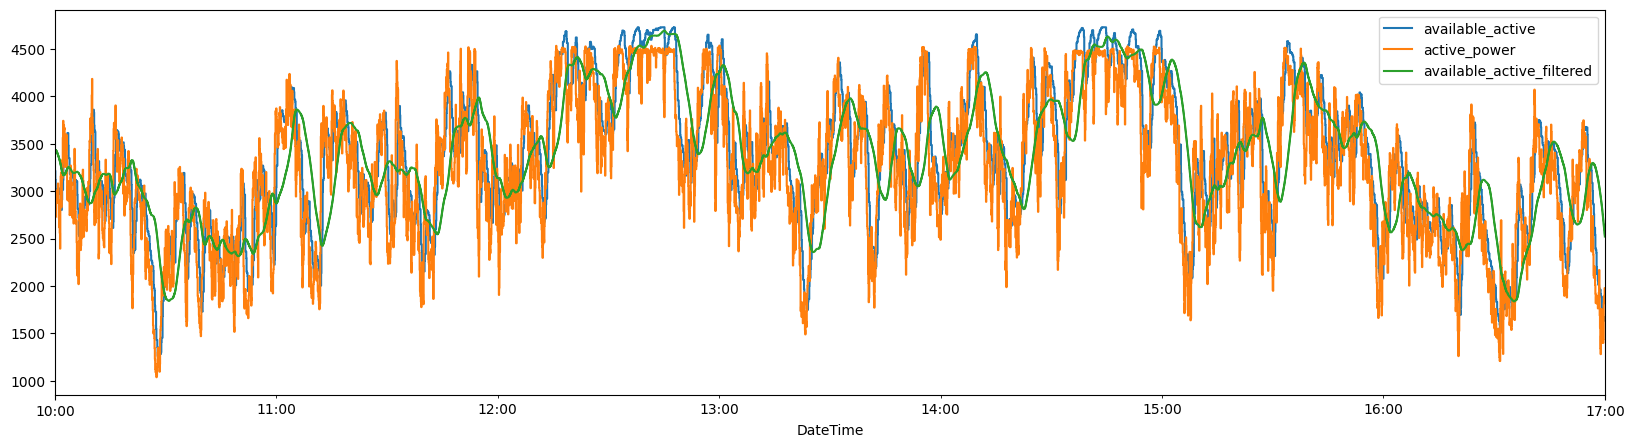

In [198]:
start = '2025-06-11 10:00:00'
end = '2025-06-11 17:00:00'
df_ = df_c2[start:end]
df_.plot(y=['available_active','active_power','available_active_filtered'],drawstyle='steps-post', figsize=(20, 5))

In [183]:
df_c2['baseline_0_error'] = df_c2['baseline_0'] - df_c2['active_power']
df_c2['baseline_0_error_filtered'] = df_c2['baseline_0_error'].rolling(window=5*60, min_periods=1).mean()

df_c2['baseline_1_error'] = df_c2['baseline_1'] - df_c2['active_power']
df_c2['baseline_1_error_filtered'] = df_c2['baseline_1_error'].rolling(window=5*60, min_periods=1).mean()

# Drop the period where we curtailed for MFRR testing
mask = (df_c2.index < '2025-06-09 10:00:00') | (df_c2.index > '2025-06-09 12:00:00')
df_c2 = df_c2[mask]

<Axes: title={'center': 'Baseline Error (5min moving average Available Active - Active Power)'}, xlabel='DateTime'>

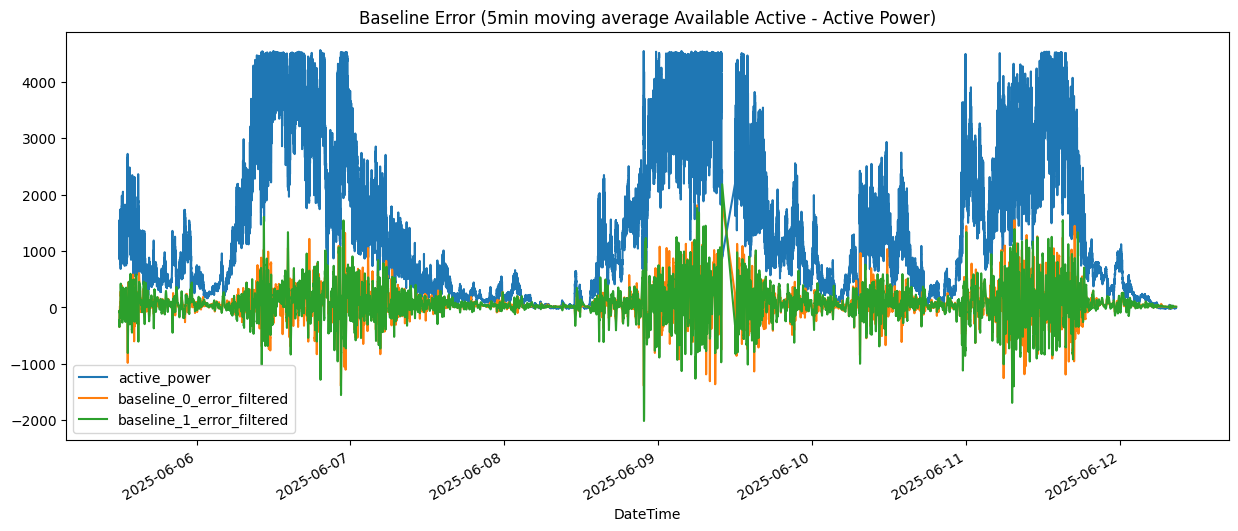

In [184]:
df_c2.plot(y=['active_power','baseline_0_error_filtered', 'baseline_1_error_filtered'], figsize=(15, 6), title='Baseline Error (5min moving average Available Active - Active Power)')

In [195]:
print("Baseline 0: Unfiltered available active power")
print("Using all time series data, no threshold")
print("--- Unfiltered error ---")
print_baseline_stats(df_c2, 'baseline_0_error')

print("\n--- Filtered error ---")
print_baseline_stats(df_c2, 'baseline_0_error_filtered')
# Assume we will not bid mfrr when below a threshold
min_mfrr_threshold = 2000  # kW
df_ = df_c2[df_c2['baseline_0'] > min_mfrr_threshold]

print(f"\n\nAssuming power threshold for MFRR bidding: {min_mfrr_threshold} kW")

print("Using all time series data, no threshold")
print("--- Unfiltered error ---")
print_baseline_stats(df_, 'baseline_0_error')

print("\n--- Filtered error ---")
print_baseline_stats(df_, 'baseline_0_error_filtered')

Baseline 0: Unfiltered available active power
Using all time series data, no threshold
--- Unfiltered error ---
|Mean error| = 72.78 kW
|95th - 5th percentile error| / 2 = 672.34 kW

--- Filtered error ---
|Mean error| = 72.25 kW
|95th - 5th percentile error| / 2 = 412.60 kW


Assuming power threshold for MFRR bidding: 2000 kW
Using all time series data, no threshold
--- Unfiltered error ---
|Mean error| = 176.09 kW
|95th - 5th percentile error| / 2 = 1100.12 kW

--- Filtered error ---
|Mean error| = 129.40 kW
|95th - 5th percentile error| / 2 = 672.50 kW


In [196]:
print("Baseline 1: 5 min moving average available active power")
print("Using all time series data, no threshold")
print("--- Unfiltered error ---")
print_baseline_stats(df_c2, 'baseline_1_error')

print("\n--- Filtered error ---")
print_baseline_stats(df_c2, 'baseline_1_error_filtered')
# Assume we will not bid mfrr when below a threshold
min_mfrr_threshold = 2000  # kW
df_ = df_c2[df_c2['baseline_1'] > min_mfrr_threshold]

print(f"\n\nAssuming power threshold for MFRR bidding: {min_mfrr_threshold} kW")

print("Using all time series data, no threshold")
print("--- Unfiltered error ---")
print_baseline_stats(df_, 'baseline_1_error')

print("\n--- Filtered error ---")
print_baseline_stats(df_, 'baseline_1_error_filtered')

Baseline 1: 5 min moving average available active power
Using all time series data, no threshold
--- Unfiltered error ---
|Mean error| = 72.81 kW
|95th - 5th percentile error| / 2 = 694.21 kW

--- Filtered error ---
|Mean error| = 72.06 kW
|95th - 5th percentile error| / 2 = 473.43 kW


Assuming power threshold for MFRR bidding: 2000 kW
Using all time series data, no threshold
--- Unfiltered error ---
|Mean error| = 156.92 kW
|95th - 5th percentile error| / 2 = 1095.69 kW

--- Filtered error ---
|Mean error| = 123.36 kW
|95th - 5th percentile error| / 2 = 757.66 kW
